In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error 

In [2]:
dataset=pd.read_csv("/content/delivery_time.csv")


In [3]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [4]:
len(dataset)

21

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
dataset.duplicated().sum()

0

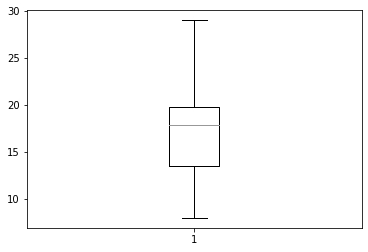

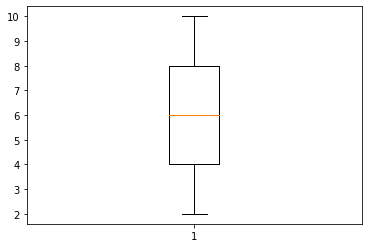

In [10]:
plt.boxplot(dataset["Delivery Time"])
plt.show()
plt.boxplot(dataset["Sorting Time"])
plt.show()

In [11]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
dataset.rename(columns = {'Delivery Time':'DT','Sorting Time':'ST'},inplace = True)

In [13]:
model = smf.ols("DT ~ ST", data=dataset).fit()

In [14]:
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [15]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [16]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
model2 = smf.ols('np.sqrt(DT)~np.sqrt(ST)' , data=dataset).fit()

In [18]:
print(model2.tvalues, '\n', model2.pvalues)  

Intercept      4.628248
np.sqrt(ST)    7.152817
dtype: float64 
 Intercept      1.833621e-04
np.sqrt(ST)    8.475706e-07
dtype: float64


In [19]:
model2.params

Intercept      1.613479
np.sqrt(ST)    1.002217
dtype: float64

In [20]:
(model2.rsquared, model2.rsquared_adj) 

(0.7292011987544664, 0.7149486302678594)

In [21]:
model3 = smf.ols('np.cbrt(DT)~np.cbrt(ST)' , data=dataset).fit()

In [22]:
print(model3.tvalues, '\n', model3.pvalues)  

Intercept      4.900067
np.cbrt(ST)    7.433210
dtype: float64 
 Intercept      9.941770e-05
np.cbrt(ST)    4.904127e-07
dtype: float64


In [23]:
model3.params

Intercept      1.013571
np.cbrt(ST)    0.845585
dtype: float64

In [24]:
(model3.rsquared, model3.rsquared_adj) 

(0.7441167577566266, 0.7306492186911859)

In [25]:
model4 = smf.ols('np.log(DT)~np.log(ST)' , data=dataset).fit()

In [26]:
(model4.rsquared, model4.rsquared_adj) 


(0.77216134926874, 0.7601698413355158)

In [27]:
model4.params 

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64

In [28]:
print(model4.tvalues , '\n' , model4.pvalues)

Intercept     13.085552
np.log(ST)     8.024484
dtype: float64 
 Intercept     5.921137e-11
np.log(ST)    1.601539e-07
dtype: float64


In [29]:
model2_pred_y =np.square(model2.predict(dataset['ST']))
model3_pred_y =pow(model3.predict(dataset['ST']),3)
model4_pred_y =np.exp(model4.predict(dataset['ST']))

In [30]:
model2_rmse =np.sqrt(mean_squared_error(dataset['DT'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset['DT'], model3_pred_y))
model4_rmse =np.sqrt(mean_squared_error(dataset['DT'], model4_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse,'\n' 'model4=', model4_rmse)

model= 2.934903768890139 
model2= 2.762294279320867 
model3= 2.755584309893576 
model4= 2.745828897614548


In [43]:
new_data=pd.Series([4,10])
new_data

0     4
1    10
dtype: int64

In [44]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

,ST
0,4
1,10


In [45]:
model.predict(data_pred)

0    13.178814
1    23.072933
dtype: float64